# 앙상블
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법.

### RandomForest
: 의사결정나무 bagging(단일모델 조합)하여 예측을 실행하는 모델

In [2]:
from sklearn import datasets
import numpy as np

np.random.seed(5)

In [3]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [5]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
# 의사결정나무를 이용한 교차검증 10번 실시
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
scores = cross_val_score(clf, features, labels, cv=10)
print('각각의 정답률 :', scores)

각각의 정답률 : [0.79444444 0.82222222 0.84444444 0.81111111 0.76666667 0.88888889
 0.91111111 0.81564246 0.82122905 0.80446927]


In [10]:
print('평균 정답률 :', scores.mean())

평균 정답률 : 0.8280229671011794


In [11]:
# 교차검증(10-fold)을 10번 실시
cv_scores = []

for i in range(10):
    scores = cross_val_score(
        clf,
        features,
        labels,
        cv=10, # cross validation 10번 실행
        scoring='accuracy', # 점수 기준 정확도
    ) # scores는 기본적으로 numpy.ndarray 형태
    cv_scores.append(scores.mean())
cv_scores

[0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786,
 0.8296958410924891]

In [22]:
np.mean(cv_scores)

0.8243516449410304

### Random Forest 교차검증 10번

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [24]:
scores = cross_val_score(rf, features, labels, cv=10)
print('각각의 정답률 :', scores)

각각의 정답률 : [0.91666667 0.97777778 0.95       0.92777778 0.96111111 0.97222222
 0.97222222 0.96648045 0.93854749 0.9273743 ]


In [25]:
print('평균 정답률 :', scores.mean())

평균 정답률 : 0.9510180012414648


In [26]:
# 교차검증(10-fold)을 10번 실시
cv_scores = []

for i in range(10):
    scores = cross_val_score(
        rf,
        features,
        labels,
        cv=10, # cross validation 10번 실행
        scoring='accuracy', # 점수 기준 정확도
    ) # scores는 기본적으로 numpy.ndarray 형태
    cv_scores.append(scores.mean())
cv_scores

[0.9471291123525759,
 0.9460242085661079,
 0.9554810676598386,
 0.9476939788950961,
 0.9449006828057106,
 0.952129112352576,
 0.9499162011173183,
 0.9454500310366232,
 0.9449068901303537,
 0.9471198013656114]

In [27]:
np.mean(cv_scores)

0.9480751086281811

In [30]:
def cross_validation(clf, data, label):
    cv_scores=[]
    for i in range(10):
        scores = cross_val_score(
            clf,
            data,
            label,
            cv=10, # cross validation 10번 실행
            scoring='accuracy', # 점수 기준 정확도
        ) # scores는 기본적으로 numpy.ndarray 형태
        cv_scores.append(scores.mean())
    return cv_scores

In [31]:
# 의사결정 나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(),features,labels)
dt_cv_scores

[0.8230384854127871,
 0.8196803227808814,
 0.8297206703910615,
 0.8230198634388579,
 0.8258348851644941,
 0.8230105524518934,
 0.8296958410924891,
 0.8313594040968344,
 0.8235692116697703,
 0.8346865301055244]

In [32]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(),features,labels)
rf_cv_scores

[0.9515797641216635,
 0.9482278088144008,
 0.9454500310366232,
 0.949897579143389,
 0.9482340161390439,
 0.9499162011173183,
 0.9493513345747981,
 0.9538019863438857,
 0.9499068901303538,
 0.9521384233395406]

> random forest는 안에 ctree가 100개씩 들어있어서 더 오래 걸린다

### 랜덤포레스트와 의사결정나무의 정확도 시각화

In [33]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [34]:
import pandas as pd

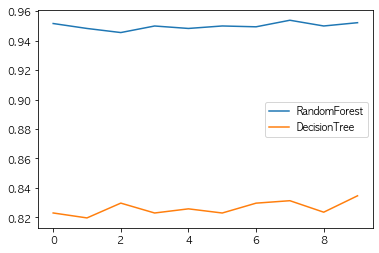

In [35]:
cv_list = {'RandomForest': rf_cv_scores, 'DecisionTree': dt_cv_scores}
df = pd.DataFrame(cv_list)

df.plot()
plt.show()

---
### Voting 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

### 단일모델 정확도 측정

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [38]:
# 의사결정나무
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)
print('dtree :',dtree_score)

dtree : 0.8861111111111111


In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('knn :', knn_score)

knn : 0.9833333333333333


In [44]:
# SVM
from sklearn.svm import SVC

svm = SVC(probability=True).fit(X_train, y_train) # probability=True
svm_score = svm.score(X_test, y_test)
print('svm :', svm_score)

svm : 0.9944444444444445


### 하드 보팅
: 각각의 분류기의 예측값들을 모아 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식.

In [45]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1], # 1대 1대 1, 보통은 점수 낮은 쪽에 보정을(가중치)
    voting='hard'
    ).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9888888888888889

### 소프트 보팅
: 각각의 분류모델 예측값들의 확률들을 더해서 가장높은 점수를 획득한 분류값으로 최종결론을 내는 방식

In [46]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1], # 1대 1대 1, 보통은 점수 낮은 쪽에 보정을(가중치)
    voting='soft'
    ).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9888888888888889

> SVM 모델에 probability=True 추가하여 확률 뽑아내기